In [1]:
import tensorflow as tf

In [2]:
import cv2
import os
from random import shuffle

In [3]:
from tqdm import tqdm

In [28]:
mnist=tf.keras.datasets.mnist  #handwritten digits

In [29]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [30]:
#normalize data as it is very big leading to big computations
x_train=tf.keras.utils.normalize(xtrain)
x_test=tf.keras.utils.normalize(xtest)
x_test[0].shape

(28, 28)

In [31]:
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [32]:
import matplotlib.pyplot as plt

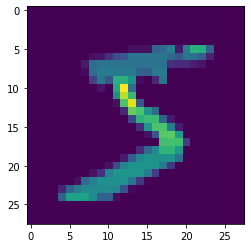

In [33]:
d=x_train[0]
d.shape=(28,28)
plt.imshow(d)
plt.show()

In [34]:
# type of sequential neural network
model=tf.keras.models.Sequential()

#define input layer
model.add(tf.keras.layers.Flatten())

#define hidden layer
model.add(tf.keras.layers.Dense(128,
         activation='relu'))

#define 2nd hidden layer
model.add(tf.keras.layers.Dense(128,
                               activation=tf.nn.relu))     #acitvation-manipulate the result group of 8 fxns defne node values  rel-if -ve value than 0 else same

#define output layer
model.add(tf.keras.layers.Dense(10,
                               activation=tf.nn.softmax))

ACTIVATION FUNCTIONS
total-8

1) Identity input and output same 
activation='relu'
f(x)=x


2) Binary step
0 x<0
1 x>=0

3) Logistis or sigmoid
f(x=1/1+e^-x)

4) arctan
f(x)=tan-x

5) Relu 

6)Leaky relu

7) Softmax
max from values has highest probability



In [35]:
model.compile(optimizer='adam',             #reduce error library adam 
             loss='sparse_categorical_crossentropy',          #which type of error to reduce 1-output =error try to reduce
             metrics=['accuracy'])                             #fitting data

In [37]:
model.fit(x_train,ytrain,epochs=4)

Epoch 1/4
60000/60000 [==============================] - 20s 341us/step - loss: 0.3120 - acc: 0.9047
Epoch 2/4
60000/60000 [==============================] - 18s 293us/step - loss: 0.1427 - acc: 0.9566
Epoch 3/4
60000/60000 [==============================] - 17s 283us/step - loss: 0.1030 - acc: 0.9685
Epoch 4/4
60000/60000 [==============================] - 17s 281us/step - loss: 0.0806 - acc: 0.9753


In [52]:
import numpy as np

In [64]:
ypred=model.predict(x_test)
np.argmax(ypred[1])


2

[1.1001562e-07 9.9954671e-01 2.7664768e-08 5.2399349e-07 1.5730865e-04
 2.1845767e-06 5.3483558e-07 2.8950768e-04 2.0947768e-06 1.0912247e-06]
1
1


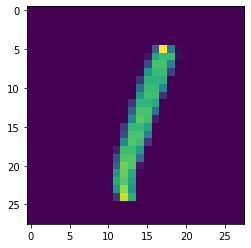

In [118]:

ypred=model.predict(x_test)
print(ypred[5])
print(np.argmax(ypred[5]))
print(ytest[5])
d=x_test[5]
d.shape=(28,28)
plt.imshow(d)
plt.show()

In [178]:
paint='D:/paint2.jpg'
img=cv2.imread(paint,0)
img.shape

(460, 819)

In [179]:
img=cv2.resize(img,(28,28))
img.shape

(28, 28)

In [180]:

img=tf.keras.utils.normalize(img)
img=img.reshape(1,28,28)

[[2.92218203e-04 1.13299601e-01 1.65361956e-01 4.88138432e-03
  3.93968642e-01 1.09280735e-01 1.99624702e-01 3.55844619e-03
  9.07972734e-03 6.52673945e-04]]
4


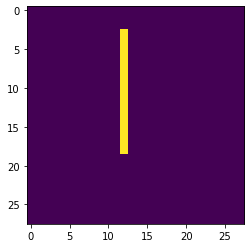

In [181]:
ypred=model.predict(img)
print(ypred)
np.argmax(ypred)
print(np.argmax(ypred))
d=img
d.shape=(28,28)
plt.imshow(d)
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,ytrain)

ValueError: Found array with dim 3. Estimator expected <= 2.

 1)make a image of a digit on paint and let your model to recognize the same
2)apply neural network over images of cats and dogs for the prediction

In [12]:
train='D:/train/train'
predict='D:/test1/test1'
 
def label_img(img):
    label=img.split('.')
    if label[0]=='cat':
        return 0
    elif label[0]=='dog':
        return 1

In [13]:
train_data=[]
def feature_data():
    for i in tqdm(os.listdir(train)):
        label=label_img(i)
        path=os.path.join(train,i)
        feature=cv2.imread(path,0)
        feature=cv2.resize(feature,(50,50))
        train_data.append([[feature],[label]])
    shuffle(train_data)
    return train_data

In [14]:
training=feature_data()

100%|████████████████████████████████████████████████████████████████████████████| 25000/25000 [08:38<00:00, 48.17it/s]


In [15]:

import numpy as np
print(np.array(training).shape)
training=np.array(training).reshape(25000,2)
train_ar=np.zeros([25000,2501])
#25000x2train_ar=np.zeros([25000,2501])
for i in range(25000):
    train_ar[i]=np.hstack((training[i][0].ravel(),training[i][1]))
    
train_ar
x=train_ar[:,:-1]
y=train_ar[:,-1:]
x.shape

(25000, 2, 1)


(25000, 2500)

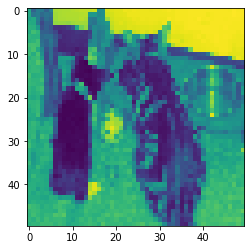

In [16]:
import matplotlib.pyplot as plt
d=x[9]
d.shape=(50,50)
plt.imshow(d)
plt.show()

In [17]:
# type of sequential neural network
model=tf.keras.models.Sequential()

#define input layer
model.add(tf.keras.layers.Flatten())

#define hidden layer
model.add(tf.keras.layers.Dense(128,
         activation='relu'))

#define 2nd hidden layer
model.add(tf.keras.layers.Dense(128,
                               activation=tf.nn.relu))     #acitvation-manipulate the result group of 8 fxns defne node values  rel-if -ve value than 0 else same

#define output layer
model.add(tf.keras.layers.Dense(2,
                               activation=tf.nn.softmax))

In [18]:
model.compile(optimizer='adam',             #reduce error library adam 
             loss='sparse_categorical_crossentropy',          #which type of error to reduce 1-output =error try to reduce
             metrics=['accuracy'])   

In [19]:
model.fit(x,y,epochs=4)

Epoch 1/4


15232/25000 [=================>............] - ETA: 12:48 - loss: 6.8549 - acc: 0.56 - ETA: 4:31 - loss: 7.3219 - acc: 0.5417 - ETA: 2:52 - loss: 6.9116 - acc: 0.568 - ETA: 2:09 - loss: 7.3833 - acc: 0.540 - ETA: 1:45 - loss: 7.1977 - acc: 0.552 - ETA: 1:30 - loss: 7.4001 - acc: 0.539 - ETA: 1:20 - loss: 7.5402 - acc: 0.531 - ETA: 1:18 - loss: 7.5053 - acc: 0.533 - ETA: 1:16 - loss: 7.5422 - acc: 0.531 - ETA: 1:10 - loss: 7.4549 - acc: 0.536 - ETA: 1:05 - loss: 7.4390 - acc: 0.537 - ETA: 1:01 - loss: 7.3301 - acc: 0.544 - ETA: 58s - loss: 7.3716 - acc: 0.542 - ETA: 55s - loss: 7.5475 - acc: 0.53 - ETA: 52s - loss: 7.4921 - acc: 0.53 - ETA: 50s - loss: 7.6007 - acc: 0.52 - ETA: 48s - loss: 7.6303 - acc: 0.52 - ETA: 47s - loss: 7.5647 - acc: 0.53 - ETA: 46s - loss: 7.5785 - acc: 0.52 - ETA: 43s - loss: 7.5634 - acc: 0.53 - ETA: 42s - loss: 7.6260 - acc: 0.52 - ETA: 41s - loss: 7.6706 - acc: 0.52 - ETA: 39s - loss: 7.5958 - acc: 0.52 - ETA: 38s - loss: 7.5619 - acc: 0.53 - ETA: 37s - loss

25000/25000 [==============================] - ETA: 9s - loss: 8.0797 - acc: 0.498 - ETA: 9s - loss: 8.0849 - acc: 0.498 - ETA: 9s - loss: 8.0879 - acc: 0.498 - ETA: 9s - loss: 8.0888 - acc: 0.498 - ETA: 9s - loss: 8.0908 - acc: 0.498 - ETA: 9s - loss: 8.1029 - acc: 0.497 - ETA: 9s - loss: 8.0986 - acc: 0.497 - ETA: 9s - loss: 8.0882 - acc: 0.498 - ETA: 9s - loss: 8.0921 - acc: 0.497 - ETA: 9s - loss: 8.0899 - acc: 0.498 - ETA: 8s - loss: 8.0928 - acc: 0.497 - ETA: 8s - loss: 8.0896 - acc: 0.498 - ETA: 8s - loss: 8.0895 - acc: 0.498 - ETA: 8s - loss: 8.0883 - acc: 0.498 - ETA: 8s - loss: 8.0843 - acc: 0.498 - ETA: 8s - loss: 8.0842 - acc: 0.498 - ETA: 8s - loss: 8.0851 - acc: 0.498 - ETA: 8s - loss: 8.0801 - acc: 0.498 - ETA: 8s - loss: 8.0790 - acc: 0.498 - ETA: 8s - loss: 8.0750 - acc: 0.499 - ETA: 8s - loss: 8.0750 - acc: 0.499 - ETA: 8s - loss: 8.0778 - acc: 0.498 - ETA: 7s - loss: 8.0795 - acc: 0.498 - ETA: 7s - loss: 8.0823 - acc: 0.498 - ETA: 7s - loss: 8.0784 - acc: 0.498 - ETA

15264/25000 [=================>............] - ETA: 12s - loss: 8.5627 - acc: 0.46 - ETA: 20s - loss: 8.2269 - acc: 0.48 - ETA: 20s - loss: 8.8985 - acc: 0.44 - ETA: 18s - loss: 8.8426 - acc: 0.45 - ETA: 19s - loss: 9.2038 - acc: 0.42 - ETA: 20s - loss: 8.9502 - acc: 0.44 - ETA: 20s - loss: 8.9720 - acc: 0.44 - ETA: 19s - loss: 8.9339 - acc: 0.44 - ETA: 19s - loss: 9.0664 - acc: 0.43 - ETA: 20s - loss: 8.9131 - acc: 0.44 - ETA: 19s - loss: 8.8727 - acc: 0.44 - ETA: 19s - loss: 8.7191 - acc: 0.45 - ETA: 19s - loss: 8.6115 - acc: 0.46 - ETA: 19s - loss: 8.5776 - acc: 0.46 - ETA: 19s - loss: 8.6036 - acc: 0.46 - ETA: 19s - loss: 8.6509 - acc: 0.46 - ETA: 19s - loss: 8.6587 - acc: 0.46 - ETA: 19s - loss: 8.6075 - acc: 0.46 - ETA: 18s - loss: 8.5942 - acc: 0.46 - ETA: 18s - loss: 8.4922 - acc: 0.47 - ETA: 18s - loss: 8.4392 - acc: 0.47 - ETA: 18s - loss: 8.4458 - acc: 0.47 - ETA: 18s - loss: 8.4759 - acc: 0.47 - ETA: 18s - loss: 8.4116 - acc: 0.47 - ETA: 18s - loss: 8.3596 - acc: 0.48 - ETA

25000/25000 [==============================] - ETA: 8s - loss: 8.0864 - acc: 0.498 - ETA: 8s - loss: 8.0863 - acc: 0.498 - ETA: 8s - loss: 8.0872 - acc: 0.498 - ETA: 8s - loss: 8.0944 - acc: 0.497 - ETA: 8s - loss: 8.0911 - acc: 0.498 - ETA: 8s - loss: 8.0941 - acc: 0.497 - ETA: 8s - loss: 8.0939 - acc: 0.497 - ETA: 8s - loss: 8.0969 - acc: 0.497 - ETA: 8s - loss: 8.0998 - acc: 0.497 - ETA: 8s - loss: 8.0986 - acc: 0.497 - ETA: 8s - loss: 8.0965 - acc: 0.497 - ETA: 8s - loss: 8.0933 - acc: 0.497 - ETA: 8s - loss: 8.0922 - acc: 0.497 - ETA: 8s - loss: 8.0840 - acc: 0.498 - ETA: 8s - loss: 8.0839 - acc: 0.498 - ETA: 8s - loss: 8.0799 - acc: 0.498 - ETA: 7s - loss: 8.0798 - acc: 0.498 - ETA: 7s - loss: 8.0768 - acc: 0.498 - ETA: 7s - loss: 8.0728 - acc: 0.499 - ETA: 7s - loss: 8.0795 - acc: 0.498 - ETA: 7s - loss: 8.0795 - acc: 0.498 - ETA: 7s - loss: 8.0785 - acc: 0.498 - ETA: 7s - loss: 8.0784 - acc: 0.498 - ETA: 7s - loss: 8.0716 - acc: 0.499 - ETA: 7s - loss: 8.0677 - acc: 0.499 - ETA

17536/25000 [====================>.........] - ETA: 24s - loss: 9.5701 - acc: 0.40 - ETA: 18s - loss: 10.5775 - acc: 0.343 - ETA: 20s - loss: 9.8220 - acc: 0.390 - ETA: 18s - loss: 9.1224 - acc: 0.43 - ETA: 19s - loss: 9.2496 - acc: 0.42 - ETA: 19s - loss: 9.1384 - acc: 0.43 - ETA: 18s - loss: 9.0072 - acc: 0.44 - ETA: 19s - loss: 8.7483 - acc: 0.45 - ETA: 19s - loss: 8.7066 - acc: 0.45 - ETA: 19s - loss: 8.6047 - acc: 0.46 - ETA: 19s - loss: 8.4465 - acc: 0.47 - ETA: 19s - loss: 8.2389 - acc: 0.48 - ETA: 19s - loss: 8.1262 - acc: 0.49 - ETA: 20s - loss: 8.1377 - acc: 0.49 - ETA: 20s - loss: 8.1924 - acc: 0.49 - ETA: 20s - loss: 8.2409 - acc: 0.48 - ETA: 20s - loss: 8.0590 - acc: 0.50 - ETA: 19s - loss: 8.0111 - acc: 0.50 - ETA: 19s - loss: 8.0590 - acc: 0.50 - ETA: 19s - loss: 8.0483 - acc: 0.50 - ETA: 19s - loss: 7.9180 - acc: 0.50 - ETA: 19s - loss: 7.9331 - acc: 0.50 - ETA: 19s - loss: 7.9844 - acc: 0.50 - ETA: 19s - loss: 7.9884 - acc: 0.50 - ETA: 19s - loss: 8.0171 - acc: 0.50 - 

25000/25000 [==============================] - ETA: 6s - loss: 8.0874 - acc: 0.498 - ETA: 6s - loss: 8.0873 - acc: 0.498 - ETA: 5s - loss: 8.0853 - acc: 0.498 - ETA: 5s - loss: 8.0807 - acc: 0.498 - ETA: 5s - loss: 8.0770 - acc: 0.498 - ETA: 5s - loss: 8.0743 - acc: 0.499 - ETA: 5s - loss: 8.0822 - acc: 0.498 - ETA: 5s - loss: 8.0838 - acc: 0.498 - ETA: 5s - loss: 8.0837 - acc: 0.498 - ETA: 5s - loss: 8.0845 - acc: 0.498 - ETA: 5s - loss: 8.0809 - acc: 0.498 - ETA: 5s - loss: 8.0755 - acc: 0.499 - ETA: 5s - loss: 8.0755 - acc: 0.499 - ETA: 5s - loss: 8.0780 - acc: 0.498 - ETA: 5s - loss: 8.0719 - acc: 0.499 - ETA: 4s - loss: 8.0642 - acc: 0.499 - ETA: 4s - loss: 8.0590 - acc: 0.500 - ETA: 4s - loss: 8.0548 - acc: 0.500 - ETA: 4s - loss: 8.0582 - acc: 0.500 - ETA: 4s - loss: 8.0582 - acc: 0.500 - ETA: 4s - loss: 8.0590 - acc: 0.500 - ETA: 4s - loss: 8.0524 - acc: 0.500 - ETA: 4s - loss: 8.0524 - acc: 0.500 - ETA: 4s - loss: 8.0574 - acc: 0.500 - ETA: 4s - loss: 8.0483 - acc: 0.500 - ETA

 8608/25000 [=========>....................] - ETA: 12s - loss: 7.0517 - acc: 0.56 - ETA: 18s - loss: 7.4294 - acc: 0.53 - ETA: 17s - loss: 7.3395 - acc: 0.54 - ETA: 18s - loss: 7.3315 - acc: 0.54 - ETA: 19s - loss: 7.7233 - acc: 0.52 - ETA: 19s - loss: 7.7904 - acc: 0.51 - ETA: 19s - loss: 7.6673 - acc: 0.52 - ETA: 18s - loss: 7.7712 - acc: 0.51 - ETA: 19s - loss: 7.7525 - acc: 0.51 - ETA: 19s - loss: 7.7685 - acc: 0.51 - ETA: 19s - loss: 7.6769 - acc: 0.52 - ETA: 19s - loss: 7.7915 - acc: 0.51 - ETA: 19s - loss: 7.8516 - acc: 0.51 - ETA: 19s - loss: 7.8004 - acc: 0.51 - ETA: 19s - loss: 7.8137 - acc: 0.51 - ETA: 19s - loss: 7.8072 - acc: 0.51 - ETA: 19s - loss: 7.8464 - acc: 0.51 - ETA: 19s - loss: 7.8983 - acc: 0.51 - ETA: 19s - loss: 7.8912 - acc: 0.51 - ETA: 20s - loss: 7.8777 - acc: 0.51 - ETA: 20s - loss: 7.8516 - acc: 0.51 - ETA: 21s - loss: 7.8072 - acc: 0.51 - ETA: 21s - loss: 7.8259 - acc: 0.51 - ETA: 21s - loss: 7.8576 - acc: 0.51 - ETA: 21s - loss: 7.8702 - acc: 0.51 - ETA

In [21]:
test_data=[]
def predict_data():
    for i in tqdm(os.listdir(predict)):
        
        path=os.path.join(predict,i)
        feature=cv2.imread(path,0)
        feature=cv2.resize(feature,(50,50))
        test_data.append([[feature]])
    shuffle(test_data)
    return test_data

In [22]:
test_ar=predict_data()

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [04:42<00:00, 44.29it/s]


In [23]:
a=np.array(test_ar).ravel()
a=a.reshape(12500,2500)
a[0].reshape(1,2500)

array([[ 95, 151,  88, ...,  19, 110, 112]], dtype=uint8)

In [24]:
b=model.predict(x[44].reshape(1,2500))
b[0]

array([0., 1.], dtype=float32)

[1.]
Dog


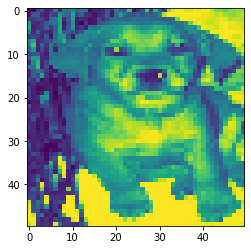

In [25]:
print(y[44])
if(np.argmax(b)==0):
    print('Cat')
else:
    print('Dog')
d=x[44]
d.shape=(50,50)
plt.imshow(d)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)